<a href="https://colab.research.google.com/github/sharmaishan1/ML-Project/blob/main/GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                         Author : Ishan Sharma
##Intern - Data Science & Business Analytics
##Task - Prediction Using Supervised Machine Learning
##Objective - What will be Predicted Score if a Student Studies for 9.25hrs/day?
##GRIP@THE SPARKS FOUNDATION


## Simple Linear Regression

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


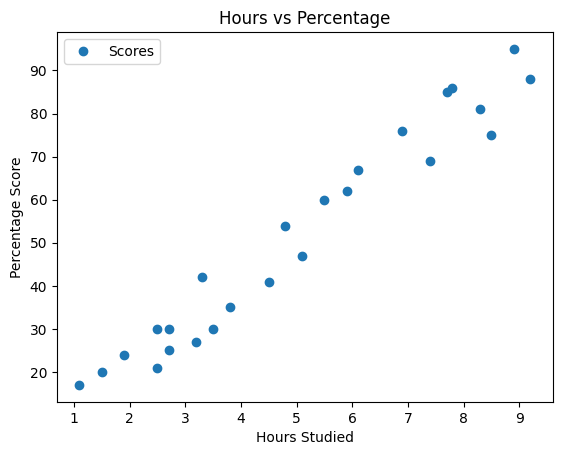

In [ ]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [ ]:
## divide our dataset into independent and dependent edatures
X = s_data.iloc[:, :-1].values  ##independent feature
y = s_data.iloc[:, 1].values  ##dependent feature

In [ ]:
## Train test split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
X.shape

(25, 1)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [ ]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train[:5]

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1]])

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

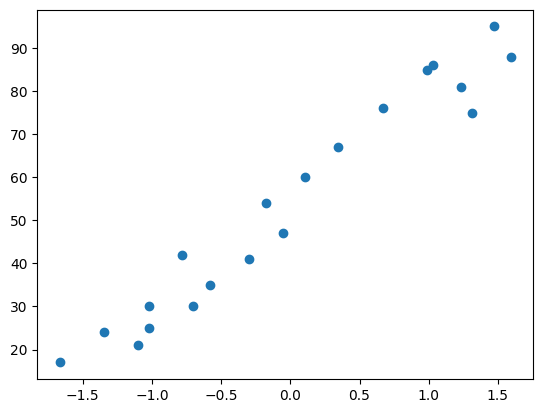

In [ ]:
plt.scatter(X_train,y_train)

In [ ]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("The slope or coefficient of hours is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of hours is  [24.6343118]
Intercept: 53.95


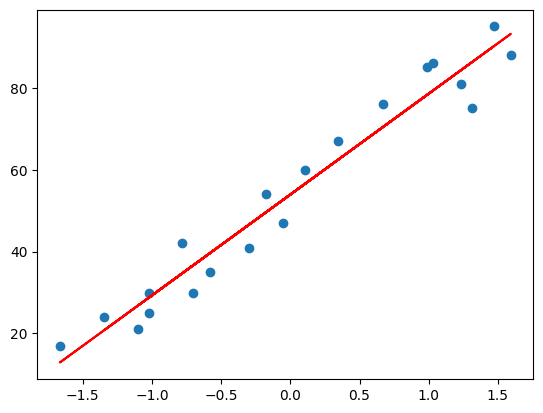

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1. predicted scores output= intercept +coef_(hours)
2. y_pred_train =53.95 + 24.634(X_train)
          
### prediction of test data
1. predicted scores output= intercept +coef_(hours)
2. y_pred_test =53.95 + 24.634(X_test)

In [ ]:
y_pred_test=regressor.predict(X_test) # Predicting the scores

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


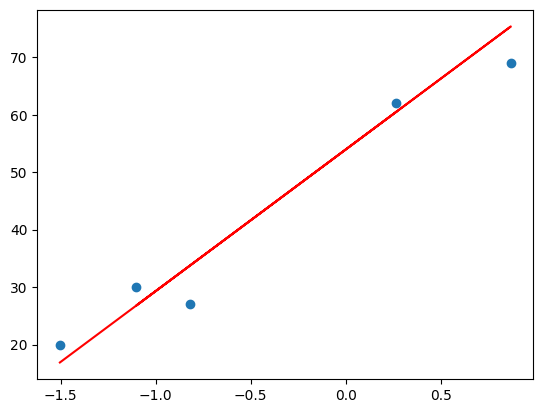

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

21.598769307217434
4.18385989900298
4.64744761210037


## R square
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [ ]:
score

0.9454906892105355

## Adjusted R Square

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [ ]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9273209189473807

In [ ]:
regressor

LinearRegression()

In [ ]:
## new data point hours is 9.25

scaled_hours=scaler.transform([[9.25]])
scaled_hours[0]

array([1.61326741])

In [ ]:
print("The scores prediction for 9.25 hours of study is :",regressor.predict([scaled_hours[0]]))

The scores prediction for 9.25 hours of study is : [93.69173249]


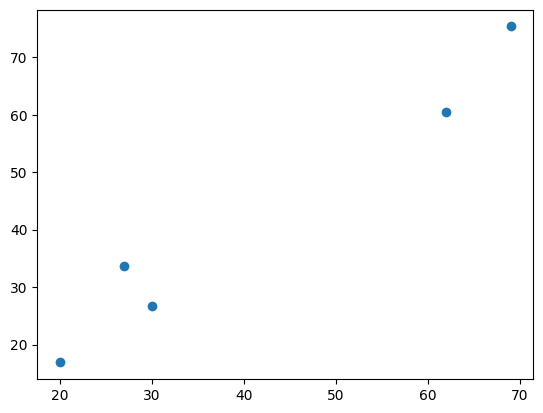

In [ ]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [ ]:
## Residuals
residuals=y_test-y_pred_test
residuals

array([ 3.11585524, -6.73226078, -6.357018  ,  3.20519876,  1.50896672])

<ipython-input-35-531549f08f17>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: ylabel='Density'>

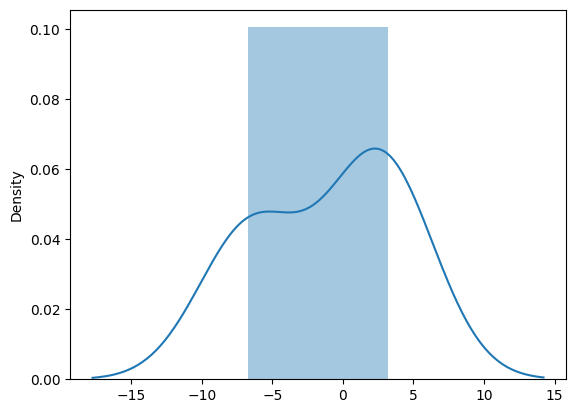

In [ ]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

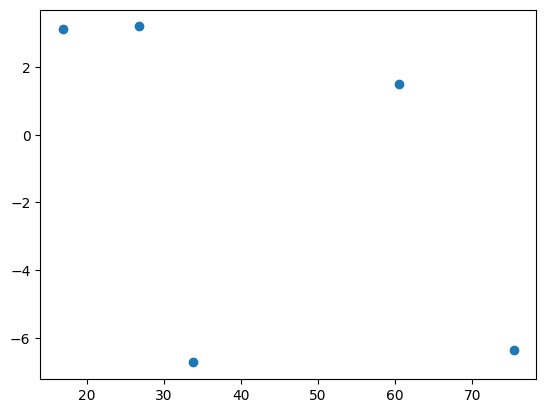

In [ ]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)